This example notebook analyzes a calibration curve using both a cubic spline and a local linear regression. It uses UncRegression on a selected slice of the data to estimate the zero crossing and then visualizes the result in a global and zoomed view. The notebook exists to show how local fitting can support threshold estimation when the full curve is nonlinear. After completing it, the reader should be able to apply a local fit and interpret the inferred crossing point.


Import plotting, data handling, interpolation, and regression utilities.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.interpolate import CubicSpline

from unc_tools import UncRegression, FunctionBase1D


Define the volume and current measurements as a DataFrame.


In [2]:
df = {
    "volume": [0,0.6, 0.9, 0.95, 1, 1.05, 1.1, 1.15, 1.20, 1.30, 1.40, 1.5, 1.6],
    "i": [0.0002, 0.0002, 0.0003, 0.0004, 0.0011, 0.0023, 0.0066, 0.0120, 0.0174, 0.0240, 0.0280, 0.033, 0.0360]
     }

df = pd.DataFrame(df)


Enable LaTeX styling for plots.


In [3]:
UncRegression.latex_style(True)


Fit a local linear model to a subset and estimate the zero crossing.


Text(0, 0.5, 'I, mA')

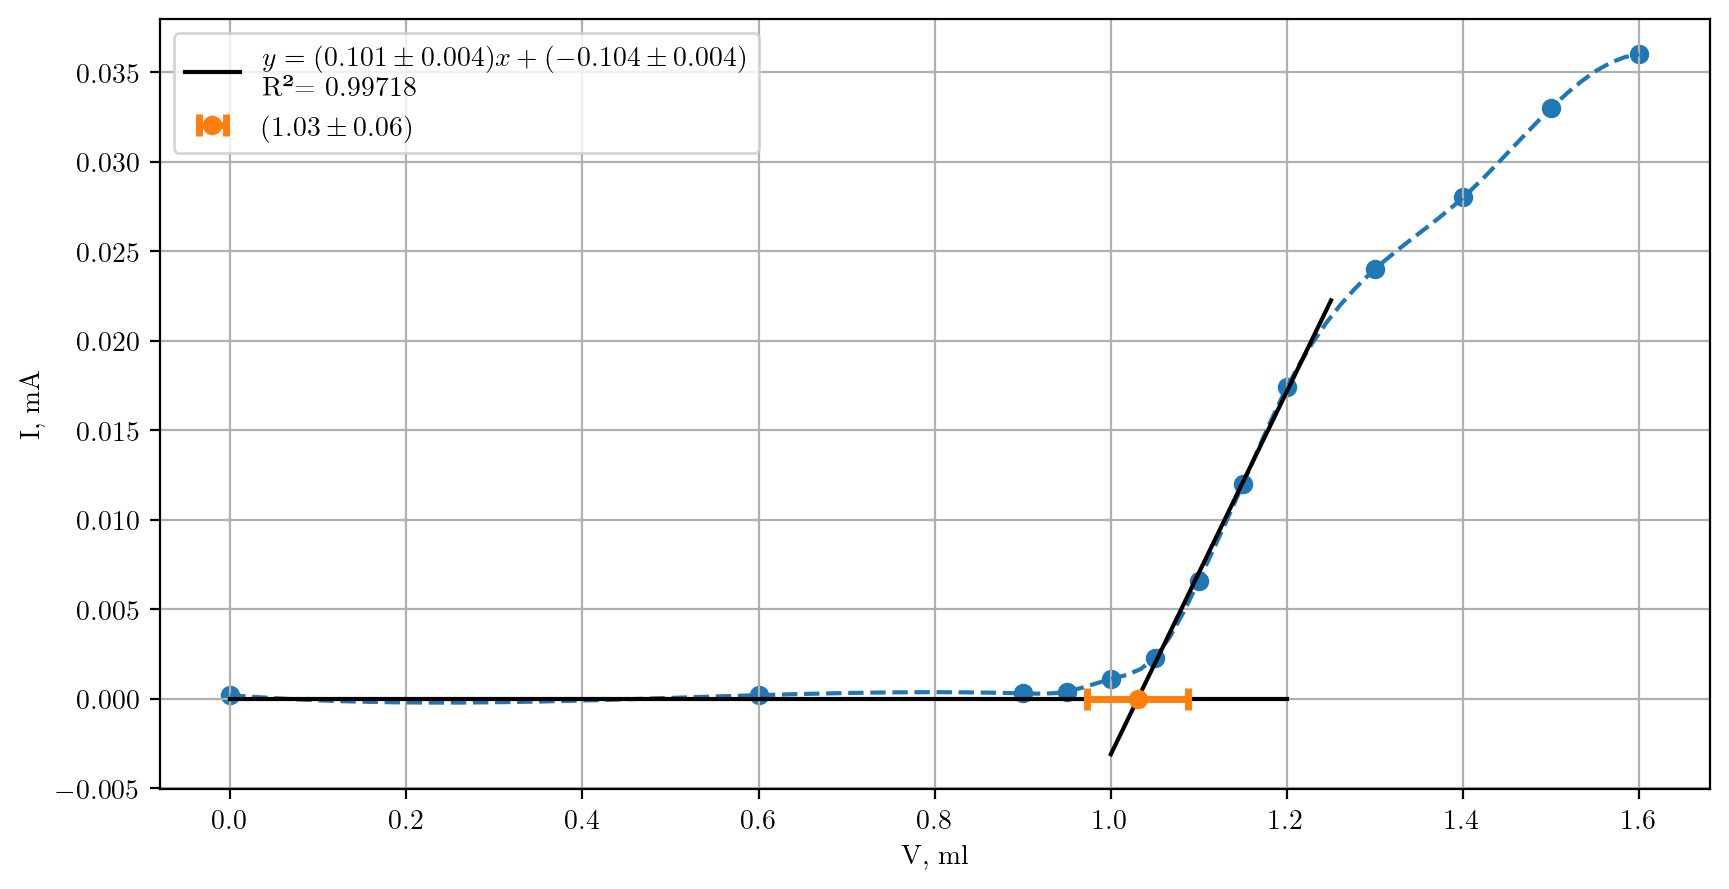

In [4]:
import unc_tools.patches
fig, ax = plt.subplots(figsize=(10,5), dpi = 200)

ax.scatter(df.volume, df.i)
spline = CubicSpline(df.volume, df.i)
x = np.linspace(df.volume.min(), df.volume.max(),100)
ax.plot(x, spline(x),"--")

# Fit a local linear model on a subset of points.
reg = UncRegression(df.volume, df.i, sl = slice(5,9))


reg.plot(x_ax=np.linspace(reg.x.min()-0.1, reg.x.max())+0.05,
          ax=ax,
          show_scatter=False,color="black")

y0 = 0
x0 = reg.find_x(y0)
ax.plot(np.linspace(0,1.2), np.linspace(0,1.2)*y0,color="black")
ax.scatter(x0,y0,label=f"$({x0})$".replace("+/-",r"\pm"))


ax.legend()
ax.set_xlabel("V, ml")
ax.set_ylabel("I, mA")


Repeat the plot with a zoomed view around the crossing.


(-0.005, 0.015)

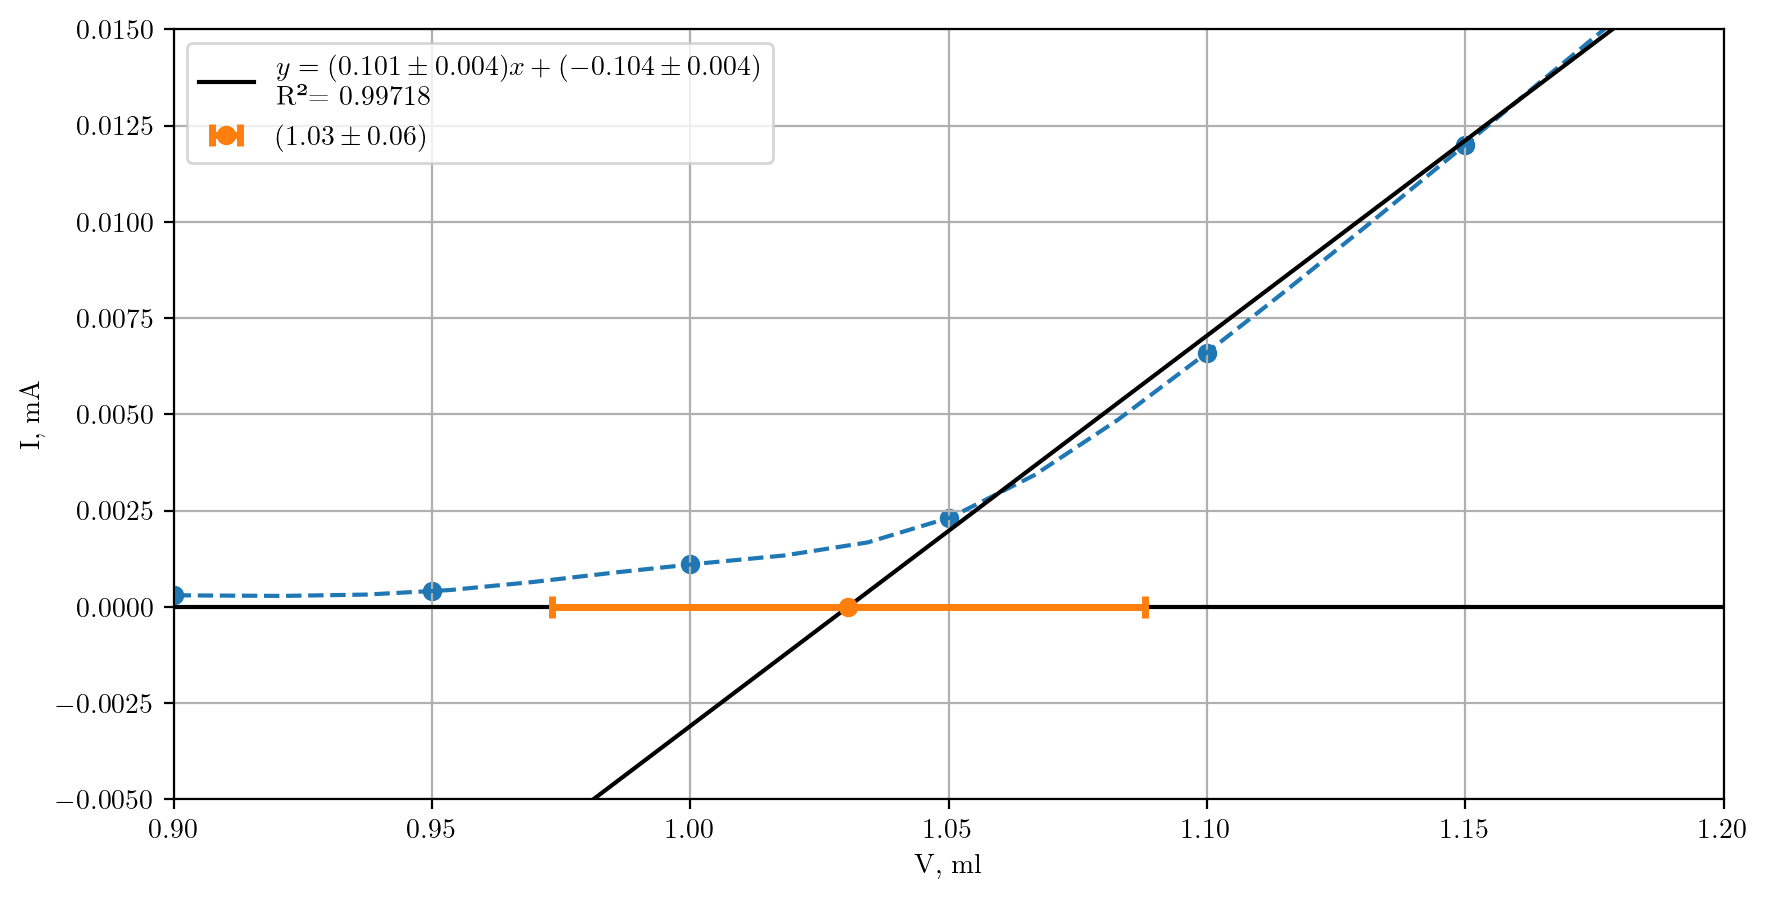

In [5]:
import unc_tools.patches
fig, ax = plt.subplots(figsize=(10,5), dpi = 200)

ax.scatter(df.volume, df.i)
spline = CubicSpline(df.volume, df.i)
x = np.linspace(df.volume.min(), df.volume.max(),100)
ax.plot(x, spline(x),"--")

# Reuse the same local fit and zoom in around the crossing.
reg = UncRegression(df.volume, df.i, sl = slice(5,9))


reg.plot(x_ax=np.linspace(x0.n-0.1, reg.x.max())+0.05,
          ax=ax,
          show_scatter=False,color="black")

y0 = 0
x0 = reg.find_x(y0)
ax.plot(np.linspace(0,1.2), np.linspace(0,1.2)*y0,color="black")
ax.scatter(x0,y0,label=f"$({x0})$".replace("+/-",r"\pm"))

ax.legend()
ax.set_xlabel("V, ml")
ax.set_ylabel("I, mA")

ax.set_xlim(0.9,1.2)
ax.set_ylim(-0.005, 0.015)
